<a href="https://colab.research.google.com/github/zebzafr/Cheatsheet-EDA/blob/master/Cheatsheet_for_basic_Exploratory_Data_Analysis_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Cheatsheet for basic Exploratory Data Analysis functions**
#####Last edited: 2020-06-10  | By: [Limor Goldhaber](https://www.linkedin.com/in/limorgoldhaber/) 
---





## **Data analysis using python**

###**Importing python libraries**




In [ ]:
# Import any python libraries you'll need below. 
# Here are some common and basic libraries used:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns

###**Importing data files**
Using Medium articles dataset from [Kaggle ](https://www.kaggle.com/hsankesara/medium-articles)

In [ ]:
#importing dataset from Google Drive
from google.colab import drive
drive.mount('/content/drive')
dataset='/content/sample_data/articles.csv'
data=pd.read_csv (dataset)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###**Inspacting your data**
  

####**.head( ) function : take a look at the *first* few rows your data**
At the beginning of any data analysis, explore the structure of the data set you'll be working with using the **head( )** function. The output will include the top 5 rows in your data set. To specify the exact number of rows shown, enter the number in head's brakets. For example: head(3) would give the first 3 rows.

In [ ]:
data.head()


,author,claps,reading_time,link,title,text
0,Justin Lee,8.3K,11,https://medium.com/swlh/chatbots-were-the-next...,Chatbots were the next big thing: what happene...,"Oh, how the headlines blared:\nChatbots were T..."
1,Conor Dewey,1.4K,7,https://towardsdatascience.com/python-for-data...,Python for Data Science: 8 Concepts You May Ha...,If you’ve ever found yourself looking up the s...
2,William Koehrsen,2.8K,11,https://towardsdatascience.com/automated-featu...,Automated Feature Engineering in Python – Towa...,Machine learning is increasingly moving from h...
3,Gant Laborde,1.3K,7,https://medium.freecodecamp.org/machine-learni...,Machine Learning: how to go from Zero to Hero ...,If your understanding of A.I. and Machine Lear...
4,Emmanuel Ameisen,935,11,https://blog.insightdatascience.com/reinforcem...,Reinforcement Learning from scratch – Insight ...,Want to learn about applied Artificial Intelli...


####**.tail() function: take a look at the *last* few rows of your data**
After exploring the first few rows of your data using the .head() function, it is important to also look at the last few rows of your data, especially in large data sets.


In [ ]:
data.tail()

####**.shape function : check the number of rows and columns in your data**

This function will provide the number of rows and columns (in this order) that exist in your dataset. 

In [ ]:
print(type(data))   # Will output the type of data imported. In this case: DataFrame
print(data.shape)   # Will output the number of rows & columns in the imported dataset (rows,columns)

####**.index & .columns functions**

In [ ]:
print(data.columns) # Will provide an output of all the columns names including the data type excluding the index column
print(data.index)   # Will provide an output of the index column in the dataset including the data type and column name 


####**.info() function: Explore data types and nulls/ NaNs in your data**

In [ ]:
data.info()  # Will provide an output of the data types as well as where the data have missing values

####**.unique() function: returns an array of the unique values**


In [ ]:
data.author.unique()

###**Data cleaning & organizing**

####**Index Column**



When there's a need to specify the column needed to be used as index, you can reimport the data set, specificing the column index location of which you'd like to use as index. 


```
pd.read_csv(source, index_coll=0)
```


####**Columns labels**




In some cases the data imported will not have columns names or we'll need to adjust the column names to make them clearer.

To do that, we can create a list of columns names (str) and store it under 'columns_names'. Then, use the 'names=' keyword when importing the data. 



```

columns_names = ['author', 'claps', 'reading_time', 'link', 'title', 'text']

pd.read_csv (data,index_col=0,names=columns_names )
```

####**Assigning N/A values**



In cases where there's missing data, we can define the values to be assigned for it. 

```
# When importing the data we can specify the column which includes the NA values and the way NA is defined in the data 
data=pd.read_csv (source,index_col=0,names=columns_names,na_values={'column_name':[' NaN']} ) 

```



####**Changing column values format: From 'K' to 1000**

In [ ]:
# replace K with 1000 and create 'claps' column an int64 type #

# Casting column 'claps' values as str
data['claps'].astype('str')   
# Storing under K True/False for all values in 'Claps' column to locate values that end with 'K'        
K = data['claps'].str.endswith('K') 
# Storing under old_value all values in 'claps' column that end with K
old_value = data.loc[K,'claps']
# replacting 'K' in old_value with '000', casting the values as a float and multiplying by 1000 to get the real values
new = old_value.str.replace('K','').astype('float') *1000
# replacing old_value with the new ones in the claps column and casting the data in the column as integer
data.loc[:,'claps']=data.loc[:,'claps'].replace(np.array(old_value),np.array(new)).astype(int)



####**Adding 2 columns: Title length, Text length**

In [ ]:
# Creating new column for title len 
# Passing values through str.len() 
data['title_len']=data.title.str.len()

# Creating new column for title len 
# Passing values through str.len() 
data['text_len']=data.text.str.len()

#### **Cleaned table view**

In [ ]:
print('First 5 columns:', data.head())
print('Last 5 columns:', data.tail())

First 5 columns:              author  claps  ...  title_len text_len
0        Justin Lee   8300  ...         71    12129
1       Conor Dewey   1400  ...         58     7730
2  William Koehrsen   2800  ...         62    14070
3      Gant Laborde   1300  ...         60     8076
4  Emmanuel Ameisen    935  ...         50    13784

[5 rows x 8 columns]
Last 5 columns:                   author  claps  ...  title_len text_len
332       Daniel Simmons   3400  ...         96     9955
333  Eugenio Culurciello   2800  ...         69    11479
334           Devin Soni   5800  ...         64     4445
335      Carlos E. Perez   3900  ...         56     7140
336      Nityesh Agarwal   2400  ...         63    12116

[5 rows x 8 columns]


###**Visual exploratory data analysis**


At the beginning of a data analysis we'll want to explore any possible relationships and other insights we can learn from the data. 

Visual exploration using line/box/scatter plots and histograms will provide a first look into the possible relationships that lies within the data. 

In addition to the visual exploration, we'll also conduct statistical exploration. Together they'll provide us with a more complete view and better understanding of the data. At this point, we'll use Pandas ploting functions (which are built on the matplotlib library). 

#####**Histogram**
Scatter plots requires specifying the plot kind to 'hist'. There are several options for customizing histograms:



```
# bins(int)            = number of intervals or bins
# range(tuple)         = extrema of bins (minimum, maximum) 
# density(boolean)      = whether to normalize to one (used to be normed)
# cumulative (boolean) = compute Cumulative Distribution Function (CDF)
```



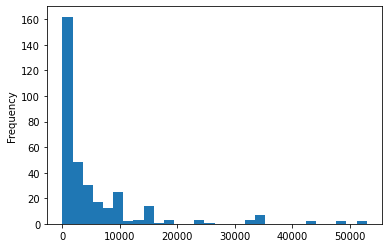

In [ ]:
title ='Medium blogs text length'
x ='Number of charecters in post'
y = 'Frequency'

data['claps'].plot(kind='hist',bins=30)

#####**Line plot**
Line plots require specificing the X, Y columns to be used. 

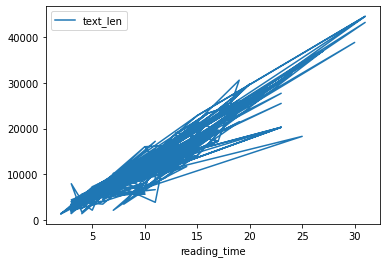

In [ ]:
data.plot (x='reading_time',y='text_len') # the default plot is a line plot. you'll need to specify the columns to be used for x,y.
plt.show()

#####**Box plot**

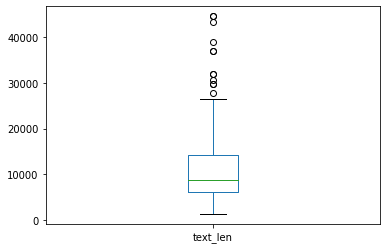

In [ ]:
data.plot(kind='box',x='reading_time',y='text_len')

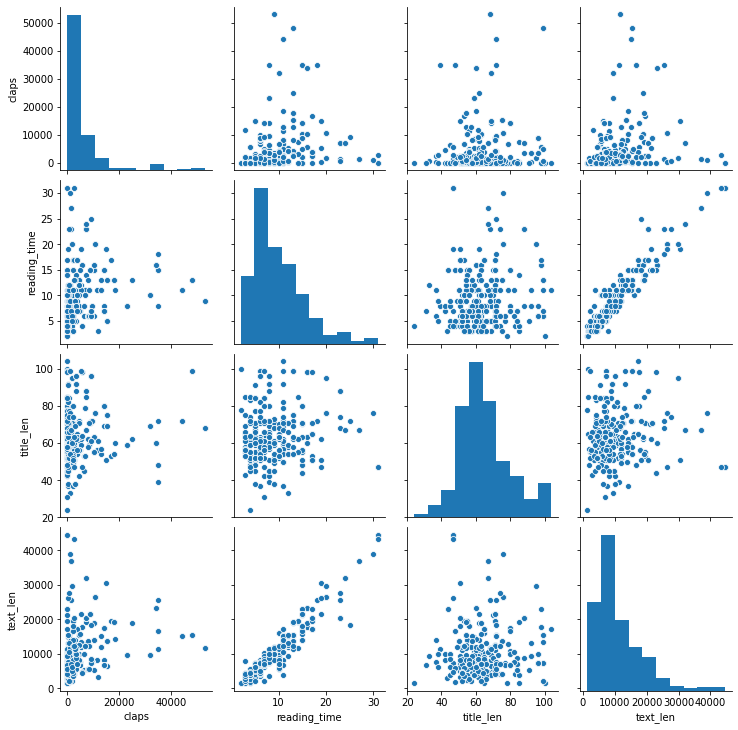

In [ ]:
sns.pairplot(data)

###**Statistical exploratory data analysis** 

####**.describe( ) function : summary statistics of your data**
To start understanding how your data is distributed, use the .describe() function. 

In [ ]:
data.describe() # provides basic statistics for all the table's columns which inlcudes numerical values

# count = number of entries 
# mean = average of entries
# std = standard deviation
# min = minimum entry
# 25% = first quartile
# 50% = median or second quartile
# 75% = third quartile 
# max = maximum entry


,claps,reading_time,title_len,text_len
count,337.000000,337.000000,337.000000,337.000000
mean,5406.311573,9.700297,64.937685,11120.160237
std,9089.187145,5.482855,14.323193,7455.120310
min,1.000000,2.000000,24.000000,1350.000000
25%,157.000000,6.000000,55.000000,6103.000000
50%,2000.000000,8.000000,63.000000,8697.000000
75%,7000.000000,13.000000,72.000000,14237.000000
max,53000.000000,31.000000,104.000000,44527.000000


####**Running stand alone summary statistics functions**

In addition to the describe function, it's also possible to run summary statistics functions seperatly / one-by-one. 


#####**.count( ) : count the number of entries**


In [ ]:
data.count()

#count() options includ:
# axis = if 0 counts entries in column, if 1 counts entries in rows. default=0
# level = int or str
# numeric_only = default None


author          337
claps           337
reading_time    337
link            337
title           337
text            337
title_len       337
text_len        337
dtype: int64

#####**.mean( ) : calculating the average of entries**


In [ ]:
data.mean()

#important options to consider:
#skipna = default False, allows calculating the average withough NA/NaN entries
#numeric_only = default None, allows calculating the average for numeric values only


claps            5406.311573
reading_time        9.700297
title_len          64.937685
text_len        11120.160237
dtype: float64

#####**.std( ) : Standard deviation**


In [ ]:
data.std()

#important options to consider:
#skipna = default False, allows calculating the average withough NA/NaN entries
#numeric_only = default None, allows calculating the average for numeric values only


claps           9089.187145
reading_time       5.482855
title_len         14.323193
text_len        7455.120310
dtype: float64

#####**.quantile( ) : Inter-quartile range (IQR)**


In [ ]:
data.quantile(q=(0.25,0.5,0.75))

#important options to consider:

#q = default 0.5 (50%) , should be defined for each quarntile needed to calculate
#axis = if 0 calculates columns, if 1 calculates rows. default=0
#numeric_only = default True, allows calculating the average for numeric values only


,claps,reading_time,title_len,text_len
0.25,157.0,6.0,55.0,6103.0
0.50,2000.0,8.0,63.0,8697.0
0.75,7000.0,13.0,72.0,14237.0


#####**.min( ), .max() : range of entries**


In [ ]:
print('minimal values:',data.min(numeric_only=True))
print('maximum values:',data.max(numeric_only=True))

#important options to consider:

#skipna = default False, allows calculating the average withough NA/NaN entries
#numeric_only = default None, allows calculating the average for numeric values only


minimal values: claps              1
reading_time       2
title_len         24
text_len        1350
dtype: int64
maximum values: claps           53000
reading_time       31
title_len         104
text_len        44527
dtype: int64


#### **Group by & aggregation functions: to uncover possible relationships within the data** 

##### **Group by**


```
The group-by function includes the following variables: 
# by = state what do you want to group by on
# axis = 0 by default. 0 = column, 1 = row
# as_index = True by default (will use group labels as index)

```



In [ ]:
blog_len = data.groupby(by=['reading_time'],axis=0,as_index= False)

#####**.agg function**

In [ ]:
blog_len.agg(['mean','median']) #one of the advantages of using .agg is that you can use it for multiple types of aggregations including with dictionaries 

claps           title_len             text_len         
                      mean   median       mean median          mean   median
reading_time                                                                
2                 8.500000      8.5  89.000000   89.0   1386.500000   1386.5
3              1147.421053    128.0  60.736842   58.0   3179.526316   3105.0
4               623.083333     19.5  59.708333   59.0   4063.791667   4216.5
5              1730.866667    166.0  64.200000   64.5   5508.733333   5520.0
6              2775.785714    937.0  67.714286   59.0   6582.404762   7135.0
7              3846.468750   1300.0  64.437500   61.0   7671.281250   7892.5
8              7310.692308   3500.0  68.038462   65.5   9129.961538   9424.5
9              8153.200000    947.0  56.066667   54.0  10433.800000  10457.0
10             6211.875000   3900.0  61.916667   63.0   9324.833333   8882.5
11             7667.481481   2800.0  67.000000   67.0  12530.814815  12879.0
12             2690.545455   4300.0  61.727273   66.0  13112.000000  12666.0
13            16106.666667  15200.0  70.200000   72.0  15157.133333  15325.0
14             2658.500000   1658.5  64.250000   58.5  17446.750000  19297.5
15             9292.545455   8700.0  61.818182   56.0  18176.000000  17761.5
16            19142.857143  10200.0  71.714286   63.0  20451.571429  18964.0
17             3923.153846   2600.0  64.769231   65.0  19140.307692  19613.0
18            35000.000000  35000.0  72.000000   72.0  25511.000000  25511.0
19             6845.666667   5400.0  53.333333   51.0  26126.333333  26302.0
20             7600.000000  10600.0  82.333333   76.0  27517.000000  26411.0
23             4637.200000   7000.0  81.200000   88.0  22825.800000  20297.0
24             7000.000000   7000.0  67.000000   67.0  31917.000000  31917.0
25             9100.000000   9100.0  72.000000   72.0  18313.000000  18313.0
27             1300.000000   1300.0  67.000000   67.0  36987.000000  36987.0
30             1000.000000   1000.0  76.000000   76.0  38831.000000  38831.0
31              928.666667     43.0  47.000000   47.0  44085.000000  44527.0

#####**.agg: custom functions (truncated mean)**

In [ ]:
# custom function taken from datacamp #
def truncated_mean (data): 

  """ compute mean excluding outliers"""

  top_val = data.quantile(.9)
  bottom_val = data.quantile(.1)
  trunc_data = data[(data<=top_val)&(data>=bottom_val)]
  mean =trunc_data.mean()
  return (mean)

# find trunc data by reading time and number of claps
blog_len.agg({'claps':[truncated_mean]})


,reading_time,claps
,,truncated_mean
0,2,NaN
1,3,624.875000
2,4,88.285714
3,5,868.920000
4,6,2957.305556
5,7,2760.708333
6,8,7044.636364
7,9,1480.545455
8,10,2788.684211
